<a href="https://colab.research.google.com/github/leorodriguez/mentoria-diplodatos-grupo2/blob/master/mentoria_grupo2_entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Mentoria')

In [ ]:
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import PIL
from PIL import Image
from os import path
from scipy import stats


from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_sets_path = "/content/drive/My Drive/Mentoria"
os.chdir('{}'.format(data_sets_path))

# Análisis General

A continuación cargamos todos los archivos de datos disponibles y los concatenamos en un único dataset. Agregamos tres columnas más a los datos, que indican respectivamente el momento del día que se tomó la imágen (Mañana, Tarde y Noche), el tamaño de la misma y el tipo de dataset (test o training).

In [ ]:
os.chdir('{}'.format(data_sets_path))

def path(day_time, size, typ):
    return ("{path}/Dataset-{time}/{size}"
    "/{time}-{size}-Labels_{typ}.csv").format(path=data_sets_path,
                                              time=day_time, size=size, typ=typ)
def build_df(day_time, size, typ):
    ds = pd.read_csv(path(day_time, size, typ))
    ds['Time'] = day_time
    ds['Size'] = size
    ds['Type'] = typ
    return ds
    
types = ["train", "test"]
day_time_list = ["M", "T", "N"]
size_list = ["G", "P"]
frames = [build_df(t, s, typ) for t in day_time_list for s in size_list for typ in types]
total_data = pd.concat(frames)
total_data

,filename,width,height,class,xmin,ymin,xmax,ymax,Time,Size,Type
0,M_G_Trabajando_Mano-Verde_7.jpg,1920,1080,hand,877,262,1121,422,M,G,train
1,M_G_Trabajando_Mano-Verde_7.jpg,1920,1080,hand,1104,121,1266,278,M,G,train
2,M_G_Trabajando_Verdes_170.jpg,1920,1080,hand,1001,332,1329,613,M,G,train
3,M_G_Trabajando_Verdes_170.jpg,1920,1080,hand,1233,289,1353,395,M,G,train
4,M_G_Trabajando_Manos_28.jpg,1920,1080,hand,812,219,944,320,M,G,train
...,...,...,...,...,...,...,...,...,...,...,...
754,N_P_Trabajando_Manos_155.jpg,1920,1080,hand,980,246,1028,298,N,P,test
755,N_P_Trabajando_Manos_155.jpg,1920,1080,hand,1073,235,1128,285,N,P,test
756,N_P_Trabajando_Amarillos_229.jpg,1920,1080,hand,993,193,1051,249,N,P,test
757,N_P_Trabajando_Amarillos_229.jpg,1920,1080,hand,1058,212,1112,270,N,P,test


El dataset completo tiene 15203 filas y 11 columnas:

In [ ]:
total_data.shape

(15203, 11)

A continuación mostramos la cantidad de imágenes disponibles según el momento del día en que fueron generadas.

In [ ]:
total_data.groupby([total_data.Time]).count()["filename"]

Time
M    5442
N    5026
T    4735
Name: filename, dtype: int64

Si separamos por el tipo de dataset (training vs test), obtenemos las siguientes cantidades:

In [ ]:
total_data.groupby([total_data.Time, total_data.Size, total_data.Type]).count()["filename"]

Time  Size  Type 
M     G     test      838
            train    1998
      P     test      733
            train    1873
N     G     test      691
            train    1696
      P     test      759
            train    1880
T     G     test      753
            train    1820
      P     test      616
            train    1546
Name: filename, dtype: int64

A modo de resumen graficamos las cantidas totales, primero agrupadas por el momento del día, y luego separado por training y test.

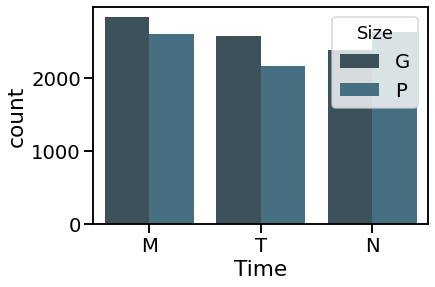

In [ ]:
sns.countplot(x="Time", hue="Size", data=total_data, palette=sns.color_palette("GnBu_d"))

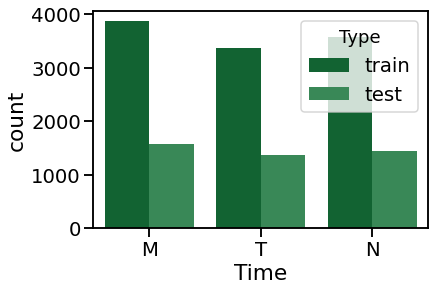

In [ ]:
sns.countplot(x="Time", hue="Type", data=total_data, palette=sns.color_palette("BuGn_r"))

# Análisis Estadístico

Se nos provee de un dataset de training que corresponde con imágenes de tipo G tomadas durante la mañana. Este dataset contiene 2048 features de las cuáles desconocemos su significado preciso, que estan enumeradadas del 0 al 2047. Mostramos un fragmento de ese dataset a continuación.

In [ ]:
def read_file(path):
  ds = pd.read_csv(path, low_memory=False)
  ds = ds.drop(['Unnamed: 0'], axis=1) 
  return ds

dataset_train_MG = read_file('Dataset-M/G/train/dataset/csv_wlabels_train_MG_df.csv')
dataset_train_MG

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Mano-Amarillo_0_double_box2.jpg,436,662,273,474,M,G,si,amarillo,1.192934,0.132554,0.292861,0.704324,0.043486,0.561370,0.492875,0.415565,0.606461,0.405709,0.532783,0.382000,0.859358,0.157759,0.539070,0.180152,0.087641,0.451658,0.067623,0.188491,0.273504,0.352612,0.365537,0.085581,0.049281,0.534786,0.346597,0.729510,0.327267,0.175310,0.214354,...,0.109618,0.201162,0.053464,0.400421,1.828703,0.766772,0.345443,0.320869,0.876834,1.105888,0.360420,0.137844,0.201754,0.184912,1.058968,0.694844,0.348436,0.221967,1.842808,0.593052,0.208990,0.419584,0.467739,0.847367,0.767512,0.429070,0.462808,0.097680,0.373019,0.055480,0.850606,0.618605,0.579222,0.214956,1.543457,0.240321,0.015946,0.498210,0.105096,0.415124
1,M_G_Mostrando_Mano-Amarillo_10_double_box2.jpg,307,503,227,357,M,G,si,amarillo,0.473153,0.326438,0.872934,0.272843,0.581942,0.085599,0.116944,1.393549,0.868530,0.557496,0.077261,0.120294,0.248606,0.222858,0.037286,0.110815,0.024490,0.304910,0.080512,0.987467,0.256264,0.208748,0.706314,0.027361,0.048373,0.121103,0.151871,0.414459,0.020769,0.036364,0.139919,...,0.114571,0.486142,0.007770,0.081066,0.650191,1.732524,0.107846,0.190294,0.139264,0.262592,0.818040,0.411074,0.561725,0.178695,1.652464,0.323930,0.114231,0.034584,0.112140,0.549182,0.521623,0.479088,0.086294,0.663143,0.556707,0.101734,0.252282,0.200444,0.193105,0.226180,0.327536,0.041440,0.610802,0.714450,1.010661,0.164083,0.489083,0.401081,0.334849,0.009120
2,M_G_Mostrando_Mano-Amarillo_11_double_box2.jpg,304,503,162,351,M,G,si,amarillo,0.551692,0.311296,0.630988,0.612515,0.324043,0.122678,0.292788,1.080067,0.315567,0.291490,0.299222,0.343937,0.387980,0.095756,0.041759,0.252472,0.021887,0.390645,0.009959,0.159158,0.046286,0.517520,0.329951,0.015500,0.208366,0.207085,0.477750,1.682721,0.211059,0.136033,0.004871,...,0.202850,0.283488,0.004961,0.331641,1.339007,1.408519,0.366572,0.162958,0.096853,0.572625,0.727882,0.139311,0.394578,0.234353,1.004670,0.320588,0.795888,0.018158,0.721928,0.496969,0.381788,0.381119,0.520868,0.709025,0.796566,0.022527,0.436449,0.095957,0.142214,0.054401,0.399043,0.194232,0.255874,0.506477,1.049478,0.093706,0.237381,0.270804,0.206780,0.021252
3,M_G_Mostrando_Mano-Amarillo_12_double_box2.jpg,320,516,102,308,M,G,si,amarillo,0.445529,1.104021,0.329798,0.772140,0.191984,0.092597,0.323702,0.493198,0.260759,0.254920,0.351949,0.659263,0.447098,0.195273,0.218607,0.268113,0.177694,0.234917,0.034185,1.457397,0.243114,0.227982,0.109678,0.034942,0.022739,0.370361,0.388175,1.431276,0.508981,0.182964,0.028220,...,0.342891,0.395380,0.000000,1.146170,2.406389,1.542115,0.599406,0.682540,0.349439,0.375349,0.910304,0.101252,0.310441,0.259261,0.752298,0.508452,1.337586,0.117757,0.462209,0.567773,0.316124,0.120465,0.518646,0.852264,0.879169,0.088652,0.956650,0.038115,0.170151,0.015820,0.151291,0.084338,0.546983,0.239140,0.521701,0.121823,0.056032,0.503652,0.516597,0.325798
4,M_G_Mostrando_Mano-Amarillo_13_double_box2.jpg,323,507,76,291,M,G,si,amarillo,0.401482,1.118310,0.485366,0.686955,0.046806,0.203579,0.343371,0.685662,0.365654,0.238447,0.164747,0.638464,0.357792,0.310761,0.130233,0.190511,0.145574,0.047850,0.008097,0.955863,0.202188,0.456735,0.175217,0.003151,0.091389,0.384982,0.245546,1.183161,0.610042,0.135109,0.068913,...,0.183034,0.248365,0.004623,1.021811,1.633345,1.578439,0.513223,0.543867,0.239947,0.230462,0.854492,0.106203,0.446704,0.263999,0.866798,0.268687,1.261234,0.019139,0.585002,0.505261,0.361614,0.125756,0.382490,1.262282,0.557245,0.088643,1.130196,0.005393,0.386618,0.028207,0.361752,0.200909,0.574926,0.532086,0.517593,0.025498,0.058469,0.502583,0.073139,0.072178
...,...,...,...,...,...,...,...,...,.

La siguiente descripción del dataset incluye a la media, la desviación estándar y los cuartiles de cada feature.

In [ ]:
dataset_train_MG.describe()

,xmin,xmax,ymin,ymax,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,771.657816,974.319138,258.218938,433.529058,0.477770,0.331842,0.445396,0.373106,0.219712,0.266277,0.432418,0.929838,0.555243,0.265715,0.323893,0.245734,0.473116,0.351616,0.216477,0.141867,0.208300,0.391411,0.406250,0.228911,0.188195,0.379157,0.539597,0.322744,0.241840,0.317191,0.278264,0.620548,0.213563,0.159680,0.193713,0.304085,0.242244,0.308130,0.313400,0.150645,...,0.395579,0.200528,0.075142,0.475661,1.288574,1.274743,0.167222,0.303251,0.430871,0.618949,0.389508,0.247155,0.190523,0.157521,0.733245,0.405542,0.502956,0.183366,0.899037,0.519834,0.175979,0.347612,0.241890,0.495322,0.757072,0.200101,0.433913,0.271685,0.409189,0.134600,0.539357,0.418268,0.352605,0.269870,0.869333,0.272479,0.221077,0.261720,0.217420,0.253174
std,322.755374,317.190835,114.742089,143.397632,0.367963,0.261997,0.347320,0.286808,0.198534,0.226057,0.315389,0.418831,0.365728,0.195801,0.250399,0.290876,0.352024,0.251262,0.174546,0.128747,0.216942,0.269424,0.370876,0.252726,0.171419,0.250389,0.442542,0.327718,0.269646,0.208702,0.239106,0.412825,0.175200,0.150416,0.172410,0.304076,0.176697,0.233776,0.206846,0.144169,...,0.311965,0.150707,0.088064,0.330557,0.749176,0.610341,0.152124,0.277516,0.291269,0.351078,0.302060,0.209879,0.148432,0.113736,0.576239,0.273691,0.373283,0.167314,0.499653,0.284278,0.166945,0.261882,0.184747,0.312581,0.340874,0.204811,0.418447,0.260211,0.228247,0.141702,0.327215,0.420016,0.312070,0.233409,0.450767,0.212012,0.205468,0.188005,0.227270,0.183336
min,0.000000,307.000000,0.000000,128.000000,0.000390,0.000000,0.000000,0.000268,0.000000,0.000000,0.000000,0.065238,0.000000,0.000932,0.000000,0.000000,0.000000,0.001869,0.000000,0.000000,0.000000,0.002415,0.001510,0.000000,0.000000,0.001431,0.003762,0.000000,0.000000,0.000000,0.000000,0.000757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012937,0.098471,0.000000,0.000000,0.003355,0.000412,0.000635,0.000000,0.000000,0.000000,0.000076,0.000000,0.000644,0.000000,0.030766,0.025648,0.000000,0.000088,0.000000,0.003396,0.042753,0.000000,0.000000,0.000000,0.008218,0.000000,0.003120,0.000000,0.000000,0.000000,0.028360,0.000000,0.000000,0.000000,0.000000,0.000000
25%,553.000000,747.750000,176.750000,322.750000,0.205745,0.136916,0.195043,0.165223,0.073274,0.099189,0.195196,0.601902,0.283189,0.121615,0.142872,0.069243,0.221102,0.171811,0.083302,0.046032,0.055697,0.187238,0.132023,0.063270,0.060963,0.197824,0.206759,0.094862,0.052130,0.163287,0.109996,0.322128,0.082701,0.051307,0.067601,0.097395,0.108273,0.145583,0.161522,0.048113,...,0.170465,0.088007,0.014220,0.236299,0.675619,0.805388,0.061588,0.110731,0.219984,0.356615,0.162219,0.093307,0.080304,0.069624,

Para facilitar el análisis de los datos, trabajaremos solamente con las features "más importantes" clasificadas según un algoritmo de selección. Calculamos cuáles son las features de mayor correlación con la columna *guantes*, que es la que querríamos predecir, y nos quedamos con las 5 mejores. Para ello usamos el algoritmo *SelectKBest* provisto por la librería *sklearn*. Se utilizó en este caso un test estadístico *chi2*, que resultó en la selección de las features mostradas a continuación.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = dataset_train_MG
data.guantes = data.guantes.apply(lambda has: 1 if has == "si" else 0)
X = data.iloc[:,9:]
#independent columns
y = data.iloc[:,7]    #target column i.e "guantes"
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe column
selected = featureScores.nlargest(5,'Score')
selected

,Specs,Score
481,481,543.761386
1118,1118,384.295152
707,707,367.749080
1933,1933,356.018378
164,164,352.436830


Graficamos la distribución de probabilidad de features seleccionadas:

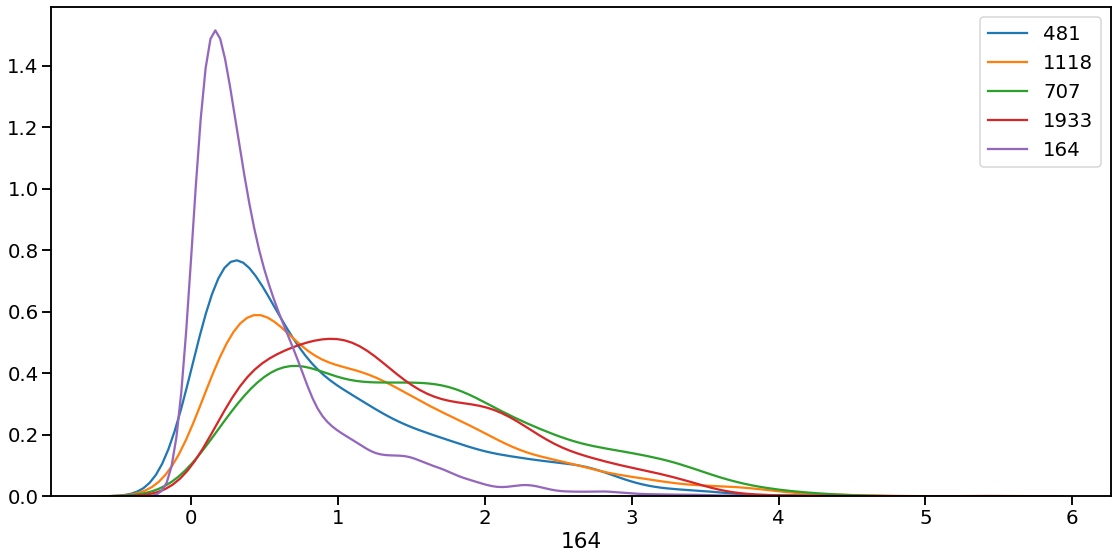

In [ ]:
plt.figure(figsize=(19,9))
for i in selected.index:
    sns.distplot(data[str(i)], label=str(i),  kde=True, hist=False)
plt.legend()

Se muestra en la siguiente tabla el rango de valores que toma cada feature seleccionada.

In [ ]:
columns = [str(i) for i in selected.index]

ranges = pd.DataFrame()
ranges['min'] = data[columns].min()
ranges['max'] = data[columns].max()
ranges['range'] = data[columns].max() - data[columns].min()
ranges


,min,max,range
481,0.000000,4.314620,4.314620
1118,0.003005,4.694402,4.691397
707,0.014325,4.434217,4.419892
1933,0.025020,5.376831,5.351811
164,0.000000,3.672178,3.672178


Observamos en el siguiente gráfico que la feature de mayor puntaje *481* obtiene valores significativamente diferenciados según se trate de imágenes
*con* o *sin* guantes.

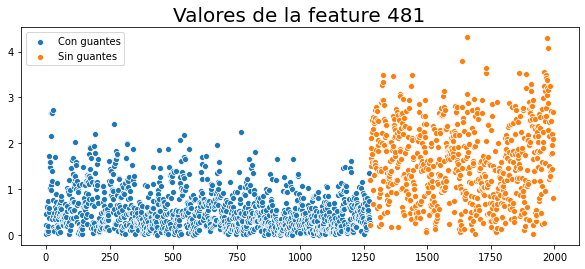

In [ ]:
plt.figure(figsize=(10,4))
feature = "481"
plot1 = sns.scatterplot(data=data[data.guantes == 1][feature], label="Con guantes")
sns.scatterplot(data=data[data.guantes == 0][feature], label="Sin guantes")
plot1.axes.set_title("Valores de la feature {}".format(feature),fontsize=20)
plt.legend()

Del mismo modo se puede apreciar que la distribución de la feature *481* también registra diferencias apreciables entre los dos grupos de imágenes.

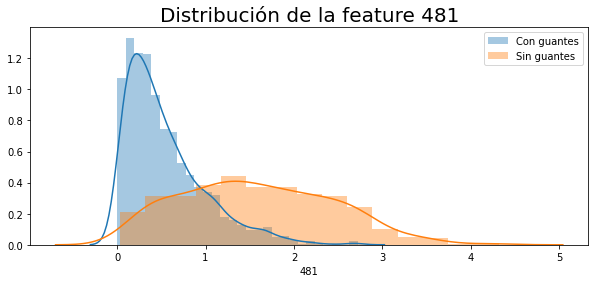

In [ ]:
plt.figure(figsize=(10,4))
feature = "481"
plot1 = sns.distplot(data[data.guantes == 1][feature], label="Con guantes")
sns.distplot(data[data.guantes == 0][feature], label="Sin guantes")
plot1.axes.set_title("Distribución de la feature {}".format(feature),fontsize=20)
plt.legend()

Gráfico distribución segun los colores [Joel]

In [ ]:
data[["filename"]].groupby(data.color).count()

,filename
color,
amarillo,587
mano,721
verde,688



Analizaremos ahora qué información podemos obtener de las coordenadas en las que se encuentran ubicados los guantes. Como primer paso, creamos un pairplot para obtener una idea cualitativa de las relaciones entre las variables de coordenadas de la mano y las features seleccionadas como las mas importantes.



Text(0.5, 0.98, '\nCorrelacion entre las features seleccionadas y las coordenadas de posicion de las manos\n')

<Figure size 720x432 with 0 Axes>

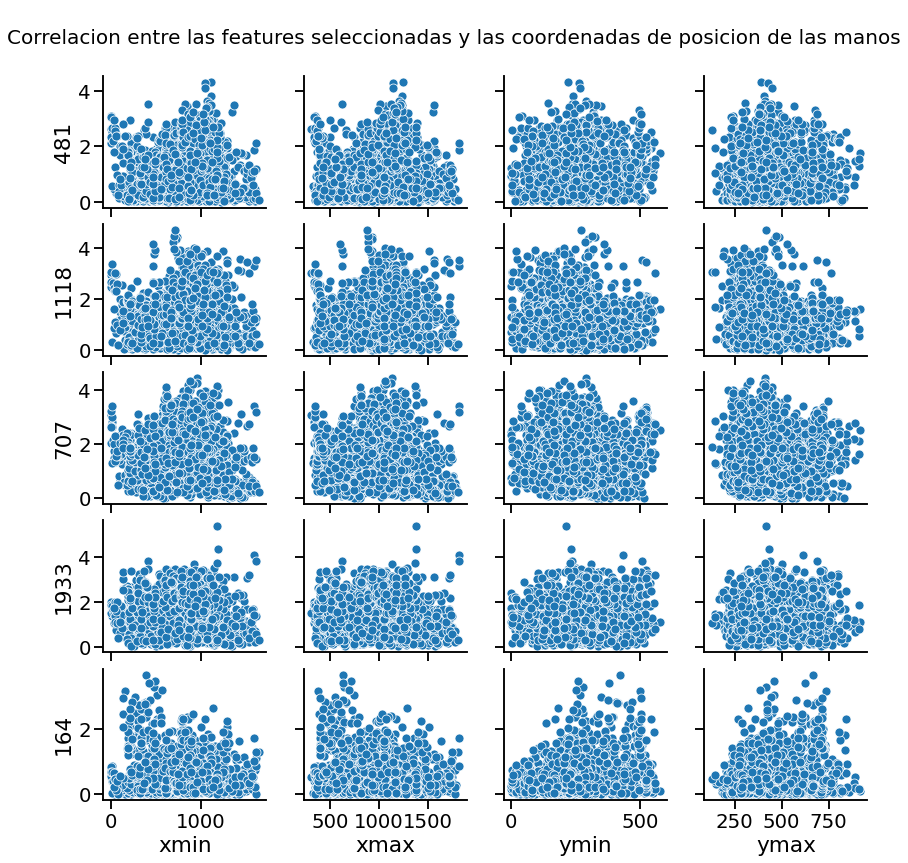

In [ ]:
sns.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,6))
g=sns.pairplot(data=dataset_train_MG, x_vars=["xmin", "xmax", "ymin", "ymax"], y_vars=['481','1118','707','1933','164'])
plt.subplots_adjust(top=0.9)
g.fig.subplots_adjust(top=0.9)
g.fig.set_size_inches(12,12)
g.fig.suptitle('\nCorrelacion entre las features seleccionadas y las coordenadas de posicion de las manos\n', fontsize=20)

A simple vista, podemos ver que no habria una relacion aparente entre las coordenadas de posicion de las manos y las features seleccionadas como las mas importantes.
Procedemos a analizar la distribucion de las variables de coordenadas para tener una idea de que test de correlacion podemos aplicar.



Analizamos cualitativamente las distribuciones de las cuatro variables de coordenadas, a partir de los siguientes histogramas.

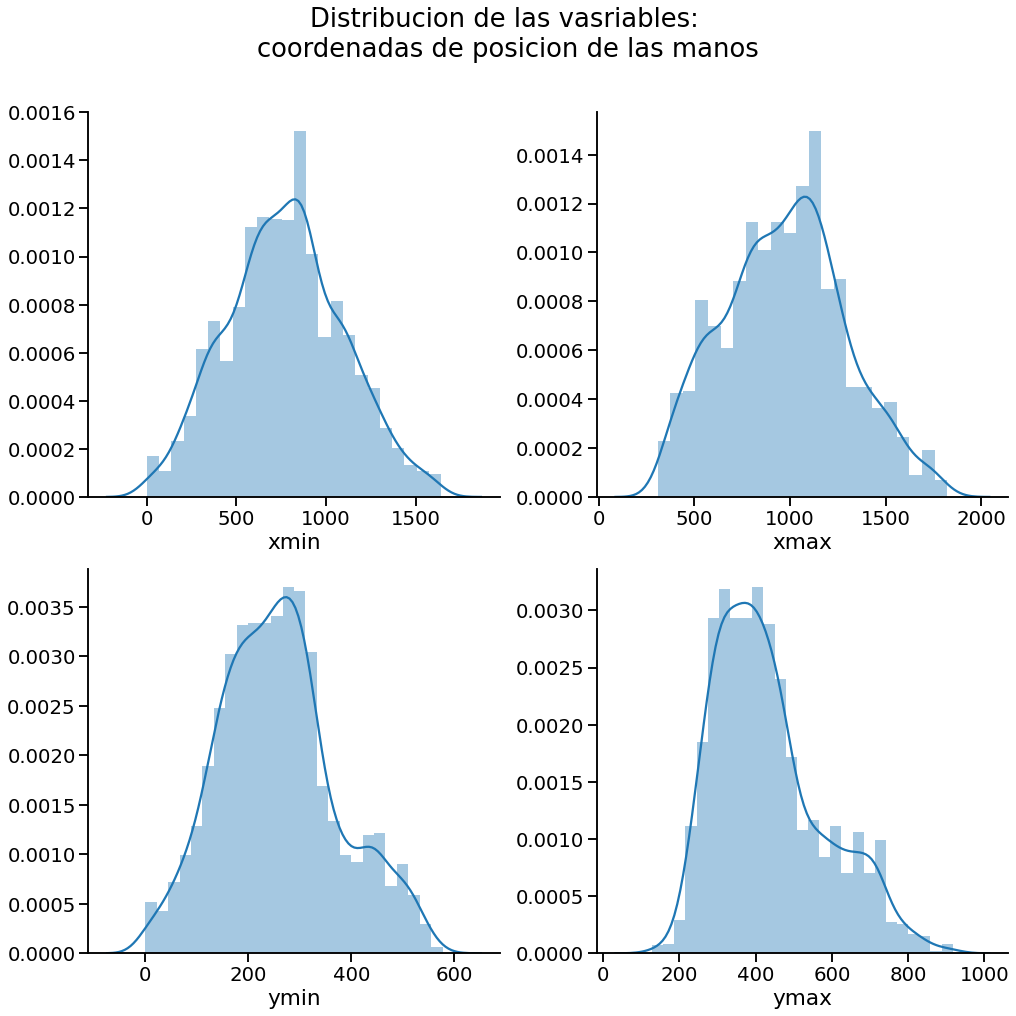

In [ ]:
coordenadas = ['xmin','xmax','ymin','ymax']
num_plots = len(coordenadas)
total_cols = 2
total_rows = 2
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
fig.suptitle('Distribucion de las vasriables: \ncoordenadas de posicion de las manos\n')

for i, var in enumerate(coordenadas):   
    row = i//total_cols
    pos = i % total_cols
    plot = sns.distplot(dataset_train_MG[var], ax=axs[row][pos])
    sns.despine()
    
   
   
  
    
    

Chequeamos cuantitativamente a traves de kstests. Concluimos que solo podemos aceptar la hipotesis nula para la coordenada en x y aceptar que se aproxima en ambos casos a una distribucion normal con un p valor mayor al 5% en ambos casos (mayor al nivel de significancia 0.05), por lo cual decidimos aplicar un test de correlacion por coeficiente de Pearson para estas variables.


En el caso de las coordenadas en y (ymin e ymax) no podemos aproximar sus respectivas distribuciones con distribuciones normales ya que obtenemos p valores muy bajos, por lo que para estas variables decidimos aplicar un test de correlacion por coeficiente de Spearman.

In [ ]:
#Aplicamos la funcion kstest de scipy para cada variable seteando los argumentos de una distribucion normal
#con media y varainza iguales a las de la variable respectiva
test1 = stats.kstest(dataset_train_MG.xmin,'norm', args=(dataset_train_MG.xmin.mean(), dataset_train_MG.xmin.std()), N= dataset_train_MG.xmin.count())
test2 = stats.kstest(dataset_train_MG.xmax,'norm', args=(dataset_train_MG.xmax.mean(), dataset_train_MG.xmax.std()), N= dataset_train_MG.xmax.count())
test3 = stats.kstest(dataset_train_MG.ymin,'norm', args=(dataset_train_MG.ymin.mean(), dataset_train_MG.ymin.std()), N= dataset_train_MG.ymin.count())
test4 = stats.kstest(dataset_train_MG.ymax,'norm', args=(dataset_train_MG.ymax.mean(), dataset_train_MG.ymax.std()), N= dataset_train_MG.ymax.count())
cols = ['Kstest_xmin','Kstest_xmax','Kstest_ymin','Kstest_ymax']
tests = [test1[1],test2[1],test3[1],test4[1]]
dict = {}
dftests = pd.DataFrame(dict, index = ["Pvalue"], columns = ['Kstest_xmin','Kstest_xmax','Kstest_ymin','Kstest_ymax'])
for i in range(4):
  dftests.loc["Pvalue",cols[i]] = tests[i]

dftests

,Kstest_xmin,Kstest_xmax,Kstest_ymin,Kstest_ymax
Pvalue,0.23339,0.069778,0.00115086,2.6495e-13


Realizamos las tablas de correlacion y creamos heatmaps para visualizarlas mejor

In [ ]:
xcolumns = ['xmin', 'xmax','481','1118','707','1933','164']

correlx = dataset_train_MG[xcolumns]
display(correlx.corr('pearson'))


,xmin,xmax,481,1118,707,1933,164
xmin,1.000000,0.986185,0.039501,0.080578,-0.005444,-0.036366,-0.114466
xmax,0.986185,1.000000,0.046863,0.078304,-0.004507,-0.035766,-0.130117
481,0.039501,0.046863,1.000000,0.715001,0.694090,0.651468,0.263419
1118,0.080578,0.078304,0.715001,1.000000,0.704805,0.668171,0.143979
707,-0.005444,-0.004507,0.694090,0.704805,1.000000,0.789135,0.258138
1933,-0.036366,-0.035766,0.651468,0.668171,0.789135,1.000000,0.316514
164,-0.114466,-0.130117,0.263419,0.143979,0.258138,0.316514,1.000000


In [ ]:
ycolumns = ['ymin','ymax','481','1118','707','1933','164']
correly = dataset_train_MG[ycolumns]
display(correly.corr('spearman'))

,ymin,ymax,481,1118,707,1933,164
ymin,1.000000,0.952398,0.151849,-0.056330,0.040257,0.114871,0.116960
ymax,0.952398,1.000000,0.167171,-0.053878,0.021352,0.112549,0.095138
481,0.151849,0.167171,1.000000,0.756339,0.715981,0.674550,0.256918
1118,-0.056330,-0.053878,0.756339,1.000000,0.732526,0.742138,0.238497
707,0.040257,0.021352,0.715981,0.732526,1.000000,0.804326,0.302171
1933,0.114871,0.112549,0.674550,0.742138,0.804326,1.000000,0.311867
164,0.116960,0.095138,0.256918,0.238497,0.302171,0.311867,1.000000


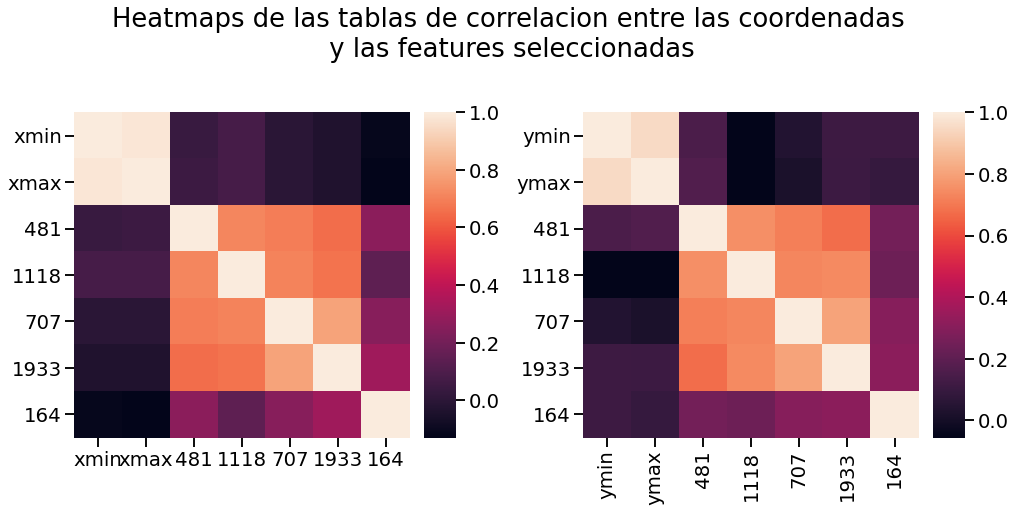

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(7*2, 7), constrained_layout=True)
fig.suptitle('Heatmaps de las tablas de correlacion entre las coordenadas\n y las features seleccionadas\n')
sns.heatmap(correlx.corr('pearson'), annot=False, ax=axs[0])
sns.heatmap(correly.corr('spearman'), annot=False, ax=axs[1])

    

Concluimos que no hay correlacion entre las variables de las coordenadas de posicion de las manos y las features seleccionadas como las mas importantes. Sin embargo, podemos observar en los heatmaps una cierta correlacion entre las features entre si.

### Distribución de las features seleccionadas, test de Kolmogorov. [Diego]


Por último, intentamos aproximar las features seleccionadas con una distribución normal. [...]

In [ ]:
from sklearn import preprocessing
selected.index

Int64Index([481, 1118, 707, 1933, 164], dtype='int64')

In [ ]:
k_tests_sin_guante = []

for feature in selected.index:
    x     = data[data.guantes == 0][str(feature)]
    mu    = np.mean( x )
    std   = np.std( x )
    n     = len( x )
    #test  = [ (y - mu)/(std*np.sqrt(n)) for y in x ]
    #Normalizo
    test = preprocessing.normalize([x])
    #kolmogorv-s
    s, p  = stats.kstest(test,'norm')

    #Aproximo una mezcla de gaussianas
    gauss_kde    = stats.gaussian_kde(x)
    #Testeo
    s1, p1 = stats.kstest(x,gauss_kde)
    #print( feature, s1, p1 )

    k_tests_sin_guante.append( {
        'Feature': str(feature),
        'Estadístico    (Distribución Normal)': s,
        'p-valor': p,
        'Estadístico    (Dist. Gauss. KDE)': s1,
        "p-valor'": p1,
        'Media': mu,
        'Desviación estándar': std,
        'N': n
    } )
    
    #k_tests.append(( reg,s,pv,mu,std,n))
k_tests_sin_guante_df = pd.DataFrame(k_tests_sin_guante)
print("Test Kolmogorv-Smirnov para manos sin guantes")
k_tests_sin_guante_df


Test Kolmogorv-Smirnov para manos sin guantes


,Feature,Estadístico (Distribución Normal),p-valor,Estadístico (Dist. Gauss. KDE),p-valor',Media,Desviación estándar,N
0,481,0.535691,0.936454,0.993471,0.0,1.578701,0.851432,721
1,1118,0.535013,0.937064,0.993419,0.0,1.775415,0.897651,721
2,707,0.527603,0.943505,0.985399,0.0,2.221155,0.868211,721
3,1933,0.537194,0.935092,0.997407,0.0,1.991783,0.795325,721
4,164,0.548289,0.924524,0.993696,0.0,0.913282,0.660454,721


In [ ]:
k_tests_con_guante = []

for feature in selected.index:
    x     = data[data.guantes == 1][str(feature)]
    mu    = np.mean( x )
    std   = np.std( x )
    n     = len( x )
    #test  = [ (y - mu)/(std*np.sqrt(n)) for y in x ]
    #Normalizo
    test = preprocessing.normalize([x])
    #kolmogorv-s
    s, p  = stats.kstest(test,'norm')

    #Aproximo una mezcla de gaussianas
    gauss_kde    = stats.gaussian_kde(x)
    #Testeo
    s1, p1 = stats.kstest(x,gauss_kde)
    #print( feature, s1, p1 )

    k_tests_con_guante.append( {
        'Feature': str(feature),
        'Estadístico    (Distribución Normal)': s,
        'p-valor': p,
        'Estadístico    (Dist. Gauss. KDE)': s1,
        "p-valor'": p1,
        'Media': mu,
        'Desviación estándar': std,
        'N': n
    } )
    
    #k_tests.append(( reg,s,pv,mu,std,n))
k_tests_con_guante_df = pd.DataFrame(k_tests_con_guante)
print("Test Kolmogorv-Smirnov para manos con guantes")

k_tests_con_guante_df

Test Kolmogorv-Smirnov para manos con guantes


,Feature,Estadístico (Distribución Normal),p-valor,Estadístico (Dist. Gauss. KDE),p-valor',Media,Desviación estándar,N
0,481,0.543335,0.929352,0.992929,0.0,0.539421,0.446028,1275
1,1118,0.543725,0.928979,0.996375,0.0,0.795944,0.587396,1275
2,707,0.529307,0.942060,0.988513,0.0,1.120233,0.682541,1275
3,1933,0.530487,0.941046,0.997376,0.0,0.973514,0.533806,1275
4,164,0.554289,0.918444,2.012893,0.0,0.286706,0.249452,1275
